# Quadratic Target; Variable Noise

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X[0, m_1) + b + \left(\sum_{i = m_1}^{m_1 + m_2} {\beta_i} + {\alpha_i}_{\chi[t_i, \infty)}(X[i]) \right); \\ 
m_2 & = 4; \\
m_1 & \ge 1; \\
s & = 5; \\
Z & = N(0, \sigma^2).
\end{align}
$$


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = 0

In [5]:
SIGMA = np.arange(0.0, 51, 5.0)

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.QuadraticWithNoiseExperiment(
    m=M, s=S, sigma=SIGMA[0]
)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


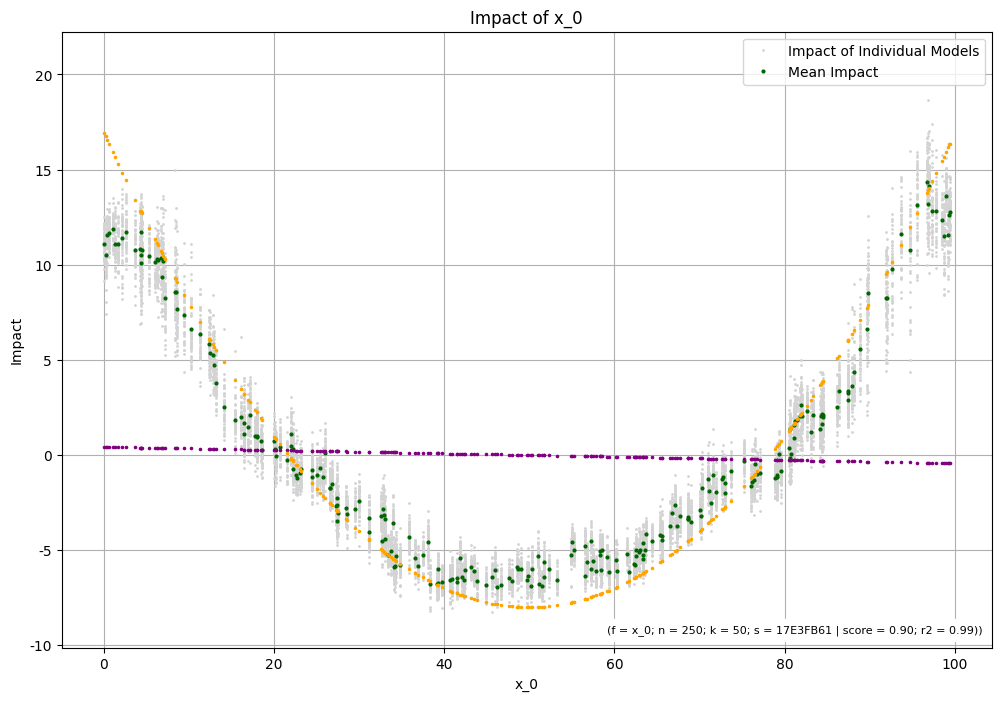

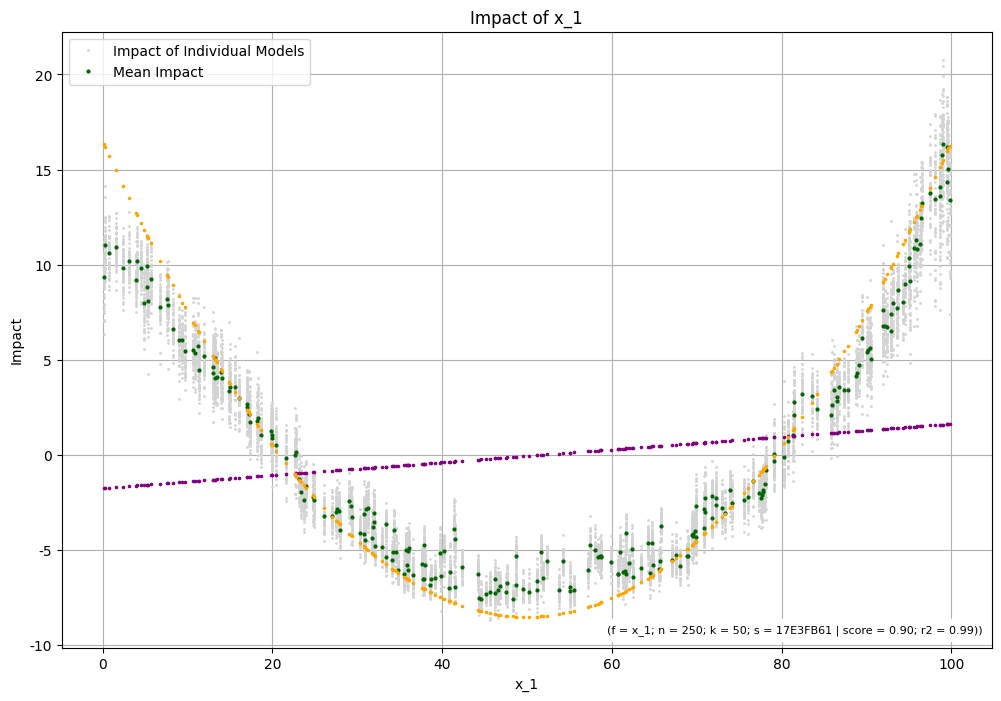

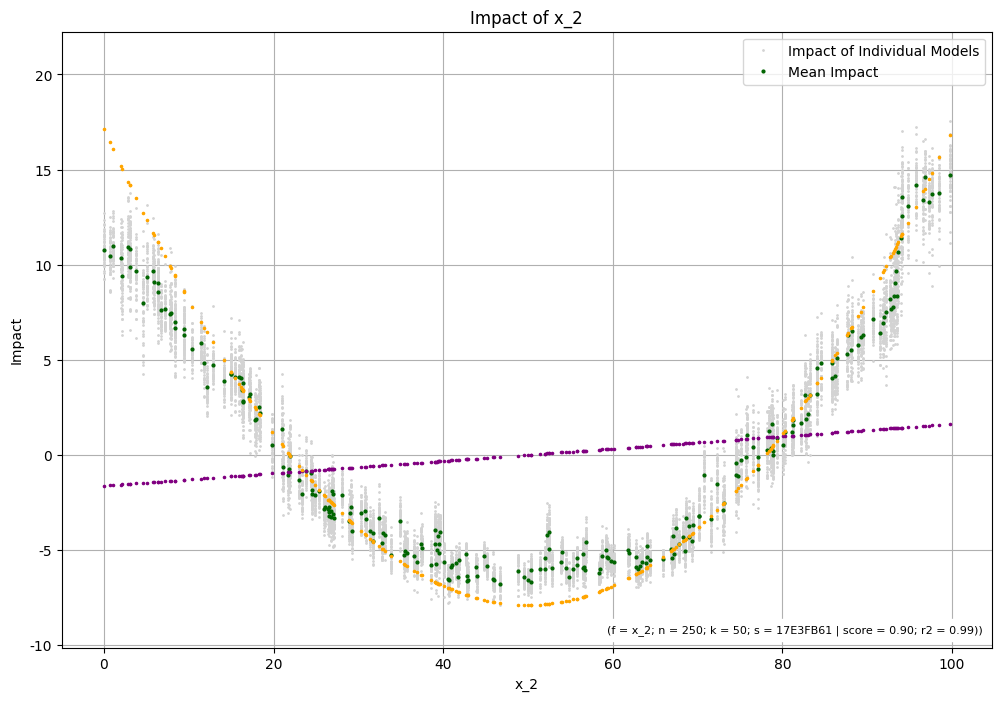

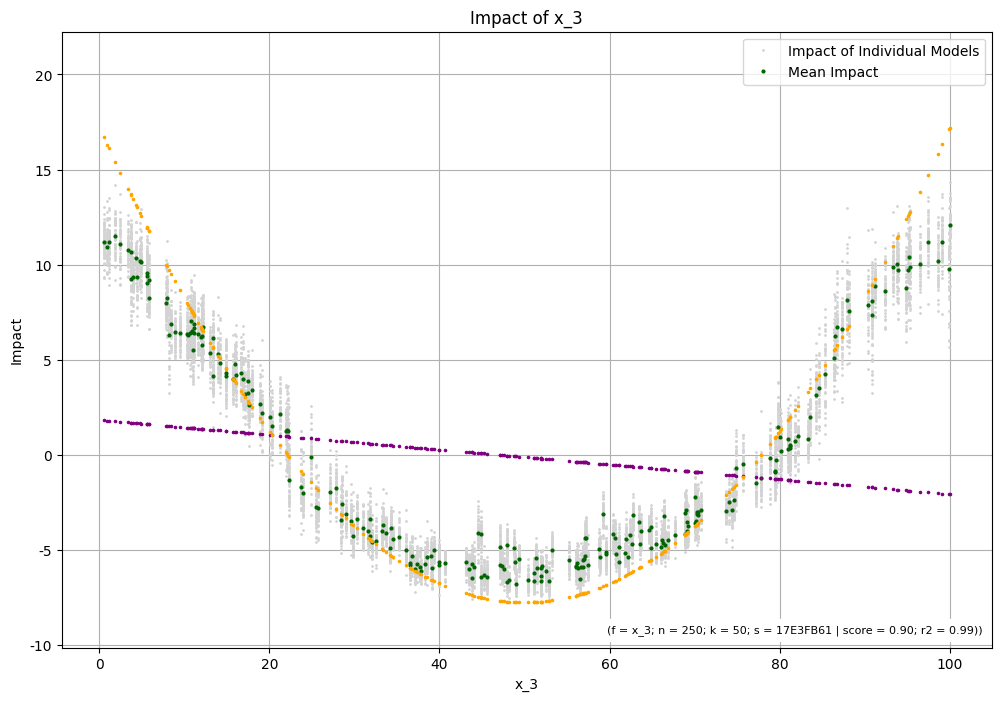

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,mu_x_i
0,RMSE,1.726942,1.721768,1.687189,1.856567,1.748116
0,MAE,1.393324,1.364593,1.277708,1.451517,1.371786
0,MED_AE,1.251702,1.180429,1.010275,1.180324,1.155682
0,LR_RMSE,7.379546,7.567247,7.196040,7.215074,7.339477
0,LR_MAE,6.199772,6.600393,6.088585,6.229852,6.279651
0,LR_MED_AE,6.049660,6.510085,6.161059,6.077370,6.199543


In [10]:
scenario.linreg_r2(N), scenario.model_r2(N)

(0.013819741800692897, 0.9918239780257785)

## A Multi-Scenario Experiment

In [11]:
experiment = ise.QuadraticWithNoiseExperiment(
    m=M, s=S, sigma=SIGMA
)

In [12]:
experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,metric,x_0,x_1,x_2,x_3,mu_x_i,m,s,sigma,IM_R2,LR_R2
0,RMSE,1.726942,1.721768,1.687189,1.856567,1.748116,4,0,0.0,0.991824,0.013820
0,MAE,1.393324,1.364593,1.277708,1.451517,1.371786,4,0,0.0,0.991824,0.013820
0,MED_AE,1.251702,1.180429,1.010275,1.180324,1.155682,4,0,0.0,0.991824,0.013820
0,LR_RMSE,7.379546,7.567247,7.196040,7.215074,7.339477,4,0,0.0,0.991824,0.013820
0,LR_MAE,6.199772,6.600393,6.088585,6.229852,6.279651,4,0,0.0,0.991824,0.013820
...,...,...,...,...,...,...,...,...,...,...,...
0,MAE,5.846771,4.288770,4.541017,5.746325,5.105721,4,0,50.0,0.169089,0.004487
0,MED_AE,5.467903,4.047021,4.458237,5.684005,4.914292,4,0,50.0,0.169089,0.004487
0,LR_RMSE,7.400051,8.082695,7.609325,7.282228,7.593575,4,0,50.0,0.169089,0.004487
0,LR_MAE,6.198357,6.882426,6.248056,6.332007,6.415212,4,0,50.0,0.169089,0.004487


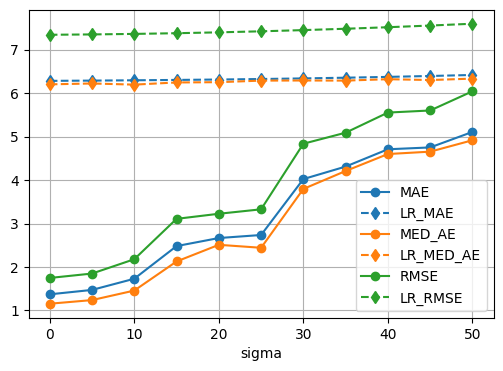

In [13]:
ax = experiment.plot_model_errors(N, x_col="sigma", y_col="mu_x_i", figsize=(6, 4))

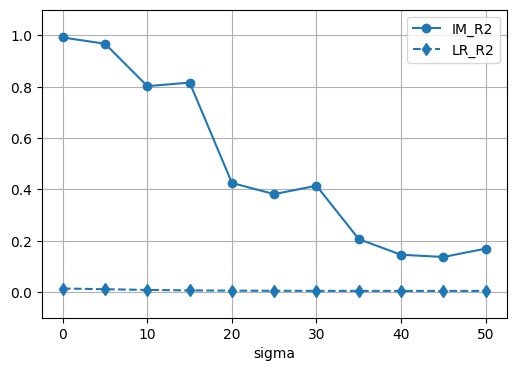

In [14]:
ax = experiment.plot_r2(N, x_col="sigma", figsize=(6, 4))